In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arm1 = np.arange(0,1.05,0.05)
priors = [
    [1,1],
    [1,3],
    [10,10],
    [10,30]
]
arm2 = 0.5

In [3]:
def bay(arm1,arm2,priors):
    regret = []
    for j in range(100):
        arms = [0]*1000
        s=0
        f=0
        q=0
        total_reward = 0
        post = [priors[0], priors[1]]
        for i in range(999,0,-1):
            if i == 999:
                arms[-1] = [0,0]
            else:
                pull2 = arm2+max(arms[i+1])
                pull1 = (post[0]+s)/(post[0]+post[1]+q) + (post[0]+s)/(post[0]+post[1]+q) * max(arms[i+1]) + (1-(post[0]+s)/(post[0]+post[1]+q)) * max(arms[i+1])
                arms[i] = [pull1, pull2]
                if max(pull1,pull2) == pull1:
                    out = np.random.choice([0,1], p=[1-arm1, arm1])
                    if out == 1:
                        s += 1
                    else:
                        f += 1
                    q += 1
                    post = [post[0]+s, post[1]+f]

        for each in arms:
            pulled = np.argmax(each)
            if pulled == 0:
                total_reward += arm1
            else:
                total_reward += arm2
        optimal = 1000*(max(arm1,arm2))
        regret.append(optimal - total_reward)
    return [np.mean(regret), np.var(regret)]

In [4]:
mu_diff = []
beta = []
regret = []
variance = []
for each in arm1:
    for every in priors:
        mu_diff.append(arm2 - each)
        beta.append(every)
        result = bay(each,arm2,every)
        regret.append(result[0])
        variance.append(result[1])
    
bay_df = pd.DataFrame()
bay_df['mu_diff'] = mu_diff
bay_df['beta'] = beta
bay_df['regret'] = regret
bay_df['variance'] = variance
bay_df

,mu_diff,beta,regret,variance
0,0.50,"[1, 1]",1.500,0.000000e+00
1,0.50,"[1, 3]",1.000,0.000000e+00
2,0.50,"[10, 10]",1.500,0.000000e+00
3,0.50,"[10, 30]",1.000,0.000000e+00
4,0.45,"[1, 1]",1.413,5.273100e-02
...,...,...,...,...
79,-0.45,"[10, 30]",449.100,3.231174e-27
80,-0.50,"[1, 1]",0.000,0.000000e+00
81,-0.50,"[1, 3]",499.000,0.000000e+00
82,-0.50,"[10, 10]",0.000,0.000000e+00


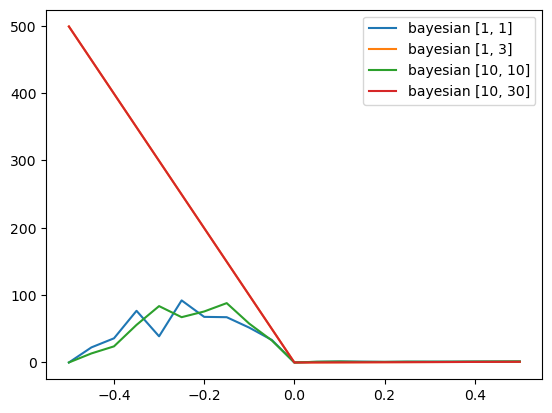

In [8]:
bay_df['beta'] = bay_df['beta'].transform(str)
# thompson_df['beta'] = thompson_df['beta'].transform(str)
bay_beta = bay_df.groupby('beta').agg({'mu_diff': lambda x: list(x),
                                       'regret': lambda x: list(x), 
                                       'variance': lambda x: list(x)
                                      }).reset_index()
# thompson_beta = thompson_df.groupby('beta').agg({'mu_diff': lambda x: list(x),
#                                        'regret': lambda x: list(x), 
#                                        'variance': lambda x: list(x)
#                                       }).reset_index()

for each in bay_beta.index:
    plt.plot(bay_beta.loc[each]['mu_diff'], 
             bay_beta.loc[each]['regret'], 
             label='bayesian '+bay_beta.loc[each]['beta'])
#     plt.plot(thompson_beta.loc[each]['mu_diff'], 
#              thompson_beta.loc[each]['regret'], 
#              label='thompson '+thompson_beta.loc[each]['beta'])
plt.legend()

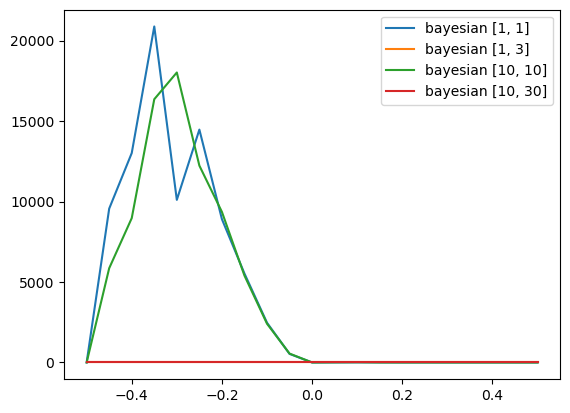

In [9]:
for each in bay_beta.index:
    plt.plot(bay_beta.loc[each]['mu_diff'], 
             bay_beta.loc[each]['variance'], 
             label='bayesian '+bay_beta.loc[each]['beta'])
#     plt.plot(thompson_beta.loc[each]['mu_diff'], 
#              thompson_beta.loc[each]['variance'], 
#              label='thompson '+thompson_beta.loc[each]['beta'])
plt.legend()